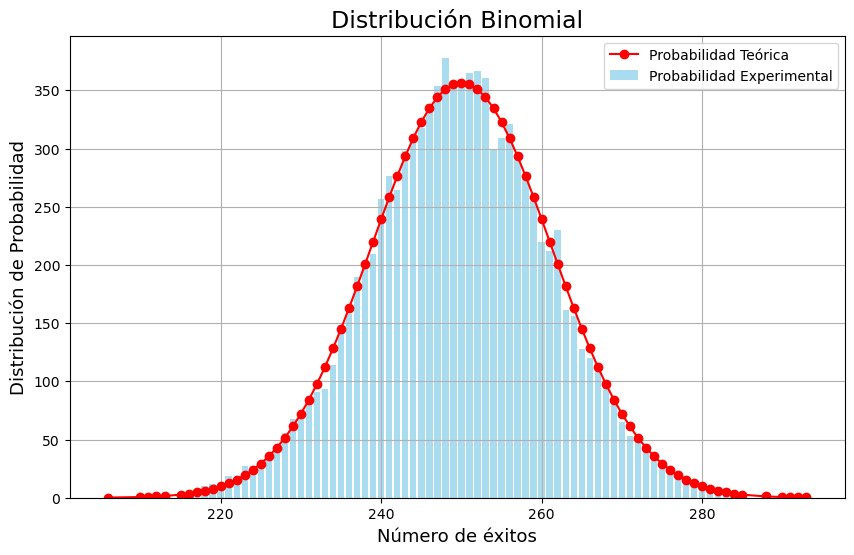

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular la probabilidad binomial teórica
def probabilidad_binomial(k, N, p):
    coef_binomial = math.factorial(n) // (math.factorial(k) * math.factorial(n - k))
    return coef_binomial * (p**k) * ((1 - p)**(n - k))

# Función para generar muestras experimentales
def Distribucion_binomial(n, p, N):
    return np.random.binomial(n, p, N)

n = 500  # Número de experimentos en cada muestra
p = 0.5  # Probabilidad de éxito
N = 10000  # Número total de muestras

# Generar muestras experimentales
muestras = Distribucion_binomial(n, p, N)

#la probabilidad experimental
x, y = np.unique(muestras, return_counts=True)

#la probabilidad teórica 
prob_teorica = np.array([probabilidad_binomial(k, n, p) * N for k in x])

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue', label='Probabilidad Experimental', alpha=0.7, width=0.8)
plt.plot(x, prob_teorica, 'o-', color='red', label='Probabilidad Teórica')
plt.title('Distribución Binomial', fontsize=17)
plt.xlabel("Número de éxitos", fontsize=13)
plt.ylabel("Distribución de Probabilidad", fontsize=13)
plt.legend()
plt.grid()
plt.show()


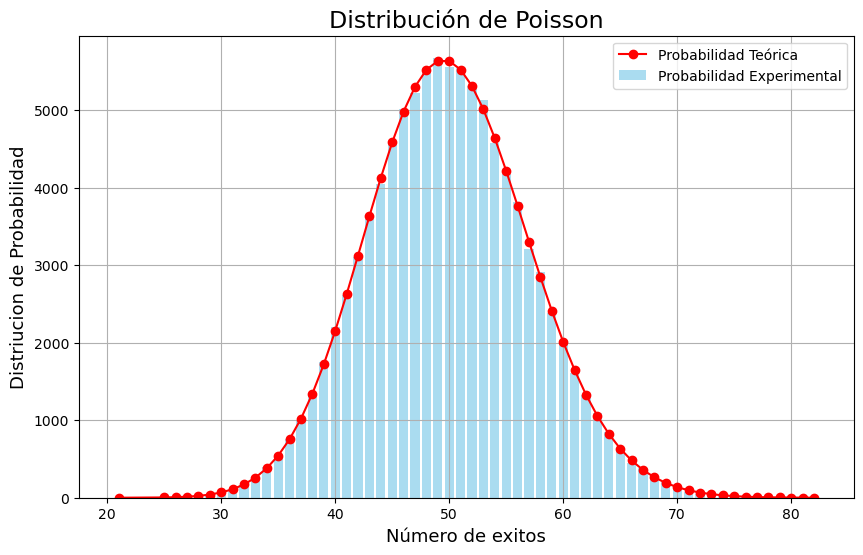

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

def Distribucion_poisson(lamda, N):
    muestras = np.random.poisson(lamda, N)
    return muestras

lamda = 50# Tasa promedio de ocurrencia (lambda)
N = 100000  # Número de muestras

muestras = Distribucion_poisson(lamda, N)

x, y = np.unique(muestras, return_counts=True)
prob_teorica = poisson.pmf(x, lamda) * N

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue', label='Probabilidad Experimental', alpha=0.7, width=0.8)
plt.plot(x, prob_teorica, 'o-', color='red', label='Probabilidad Teórica')
plt.title("Distribución de Poisson", fontsize=17)
plt.xlabel("Número de exitos", fontsize=13)
plt.ylabel("Distriucion de Probabilidad", fontsize=13)
plt.legend()
plt.grid()
plt.show()


Probabilidad de que una molécula esté en V1: 0.17
Probabilidad de que una molécula esté en V2: 0.83
Número medio de moléculas en V1: 16.67
Número medio de moléculas en V2: 83.33


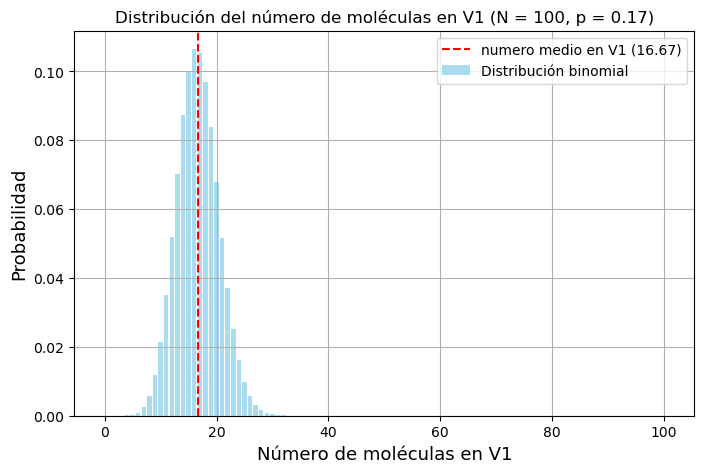

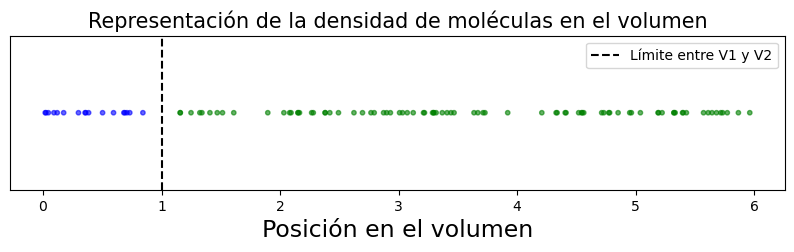

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

N = 100  # Número total de moléculas
V1 = 1  # Volumen V1
V2 = 5  # Volumen V2
V = V1 + V2  # Volumen total
p = V1 / V  # Probabilidad de estar en V1
q = V2 / V  # Probabilidad de estar en V2

# a) Probabilidad de que una molécula esté en V1 y V2
print(f"Probabilidad de que una molécula esté en V1: {p:.2f}")
print(f"Probabilidad de que una molécula esté en V2: {q:.2f}")

# b) Distribución binomial para el número de moléculas en V1
n = np.arange(0, N+1)
probabilidades = binom.pmf(n, N, p)

# c) Número promedio de moléculas en cada volumen
N1_medio = N * p
N2_medio = N * q
print(f"Número medio de moléculas en V1: {N1_medio:.2f}")
print(f"Número medio de moléculas en V2: {N2_medio:.2f}")

# Graficar la distribución
plt.figure(figsize=(8, 5))
plt.bar(n, probabilidades, color='skyblue', alpha=0.7, label='Distribución binomial')
plt.axvline(N1_medio, color='red', linestyle='--', label=f'numero medio en V1 ({N1_medio:.2f})')
plt.title(f"Distribución del número de moléculas en V1 (N = {N}, p = {p:.2f})")
plt.xlabel("Número de moléculas en V1", fontsize=13)
plt.ylabel("Probabilidad", fontsize=13)
plt.legend()
plt.grid()
plt.show()

# Movimiento de moléculas
def moleculas(N, V1, V2):
    positions = np.random.rand(N) * V  # Posiciones aleatorias en el volumen total
    colors = ['blue' if x < V1 else 'green' for x in positions]  # Asignar colores según región

    plt.figure(figsize=(10, 2))
    plt.scatter(positions, np.zeros(N), c=colors, alpha=0.6, s=10)
    plt.axvline(V1, color='black', linestyle='--', label='Límite entre V1 y V2')
    plt.title("Representación de la densidad de moléculas en el volumen", fontsize=15)
    plt.xlabel("Posición en el volumen", fontsize=17)
    plt.yticks([])
    plt.legend()
    plt.show()

moleculas(N, V1, V2)


Número medio de moléculas en V: 200.01
Dispersión relativa: 0.0634


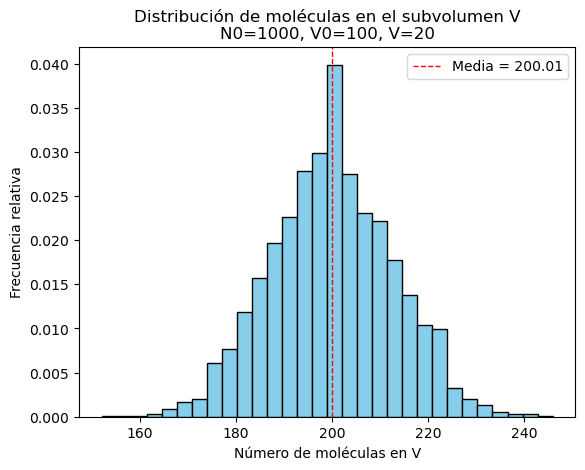

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
N0 = 1000  # Número total de moléculas
V0 = 100   # Volumen total del recipiente
V = 20     # Subvolumen considerado

# Probabilidad de que una molécula esté en el subvolumen V
p = V / V0

# Simulación de la distribución de moléculas en el subvolumen V
num_simulaciones = 10000
moleculas_en_V = np.random.binomial(N0, p, num_simulaciones)

# Cálculo de la media y la dispersión relativa
N_promedio = np.mean(moleculas_en_V)
varianza = np.var(moleculas_en_V)
dispersion_relativa = np.sqrt(varianza) / N_promedio

# Resultados
print(f"Número medio de moléculas en V: {N_promedio:.2f}")
print(f"Dispersión relativa: {dispersion_relativa:.4f}")

# Visualización
plt.hist(moleculas_en_V, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title(f"Distribución de moléculas en el subvolumen V\nN0={N0}, V0={V0}, V={V}")
plt.xlabel("Número de moléculas en V")
plt.ylabel("Frecuencia relativa")
plt.axvline(N_promedio, color='red', linestyle='dashed', linewidth=1, label=f"Media = {N_promedio:.2f}")
plt.legend()
plt.show()


Text(0.5, 1.0, 'Caminante aleatorio en 1D')

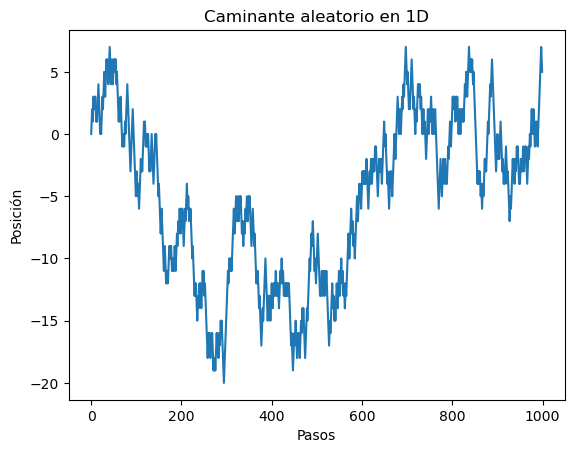

In [9]:
import matplotlib.pyplot as plt
import plotly
import numpy as np

def Caminante_1D(N,x): #N número de pasos, x posición inicial
    caminata= np.zeros(N,dtype=np.int64) #Creamos un vestor para la posición
    caminata[0]= x
    for i in range (1,N): #Creamos al caminante
        pasos = np.random.choice([-1,1], p=[.5,.5]) #los pasos alearios
        caminata[i] = caminata[i-1] + pasos
    return caminata
    
N =1000
C1 = Caminante_1D(N,0)
plt.plot(C1)

plt.xlabel('Pasos', fontsize=10)
plt.ylabel('Posición', fontsize=10)
plt.title('Caminante aleatorio en 1D')

Text(0.5, 1.0, 'Caminantes Aleatorios en 1D partiendo del mismo punto de inicio')

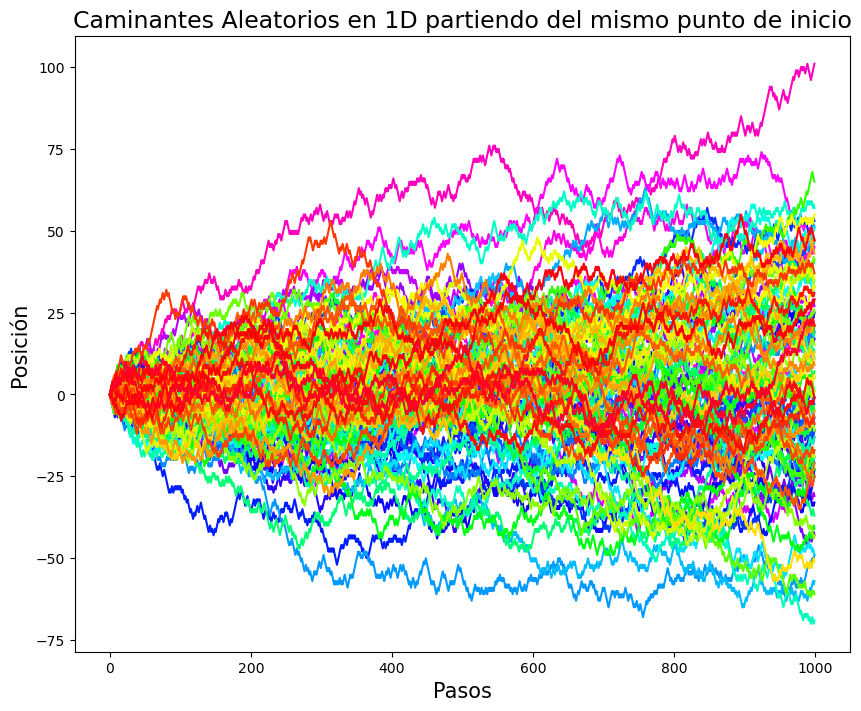

In [33]:

import matplotlib.pyplot as plt
import plotly
import numpy as np

def Caminante_1D(N,x): #N número de pasos, x posición inicial
    caminata= np.zeros(N,dtype=np.int64) #Creamos un vestor para la posición
    caminata[0]= x
    for i in range (1,N): #Creamos al caminante
        pasos = np.random.choice([-1,1], p=[.5,.5]) #los pasos alearios
        caminata[i] = caminata[i-1] + pasos
    return caminata

N=1000 #numero de pasos
n= 100 #nuemero de caminantes

color_idx =np.linspace(1,0,n)
fig,ax=plt.subplots(figsize=(10,8))
for i in range (0,n):
    caminante = Caminante_1D(N, 0) #Indicamos que todos los caminantes tienen el mismo punto de inicio
    ax.plot(caminante, color=plt.cm.gist_rainbow(color_idx[i]))

ax.set_xlabel('Pasos', fontsize=15)
ax.set_ylabel('Posición', fontsize=15)
ax.set_title('Caminantes Aleatorios en 1D partiendo del mismo punto de inicio', fontsize=17)

Text(0.5, 1.0, 'Caminantes Aleatorios en 1D partiendo de diferentes puntos de inicio')

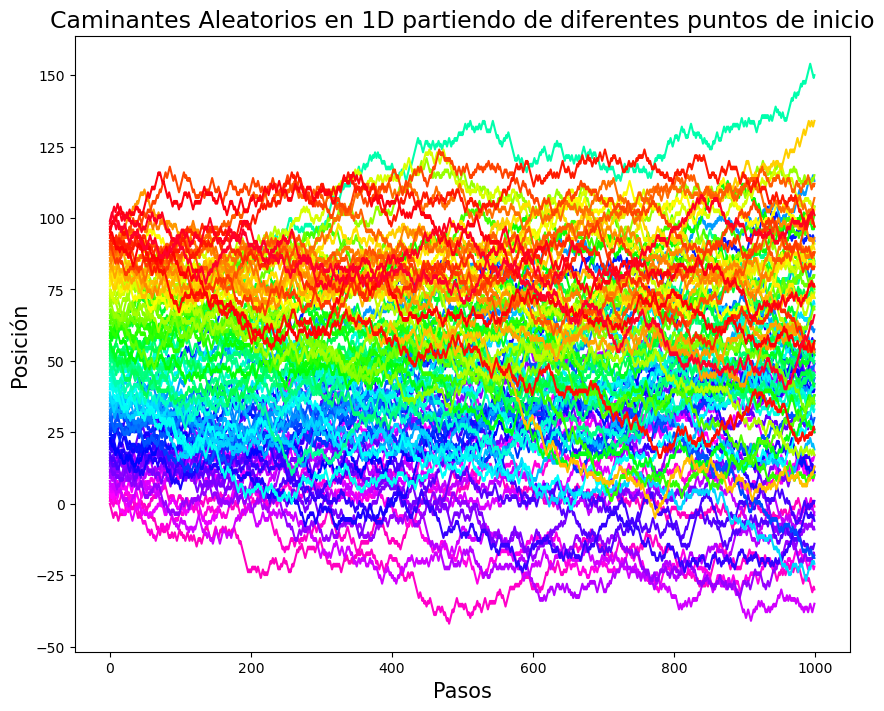

In [35]:
import matplotlib.pyplot as plt
import plotly
import numpy as np

def Caminante_1D(N,x): #N número de pasos, x posición inicial
    caminata= np.zeros(N,dtype=np.int64) #Creamos un vestor para la posición
    caminata[0]= x
    for i in range (1,N): #Creamos al caminante
        pasos = np.random.choice([-1,1], p=[.5,.5]) #los pasos alearios
        caminata[i] = caminata[i-1] + pasos
    return caminata

N=1000 #numero de pasos
n= 100 #nuemero de caminantes

color_idx =np.linspace(1,0,n)
fig,ax=plt.subplots(figsize=(10,8))
for i in range (0,n):
    caminante = Caminante_1D(N, i)#Indicamos que todos los caminantes inician en diferentes posiciones
    ax.plot(caminante, color=plt.cm.gist_rainbow(color_idx[i]))

ax.set_xlabel('Pasos', fontsize=15)
ax.set_ylabel('Posición', fontsize=15)
ax.set_title('Caminantes Aleatorios en 1D partiendo de diferentes puntos de inicio', fontsize=17)

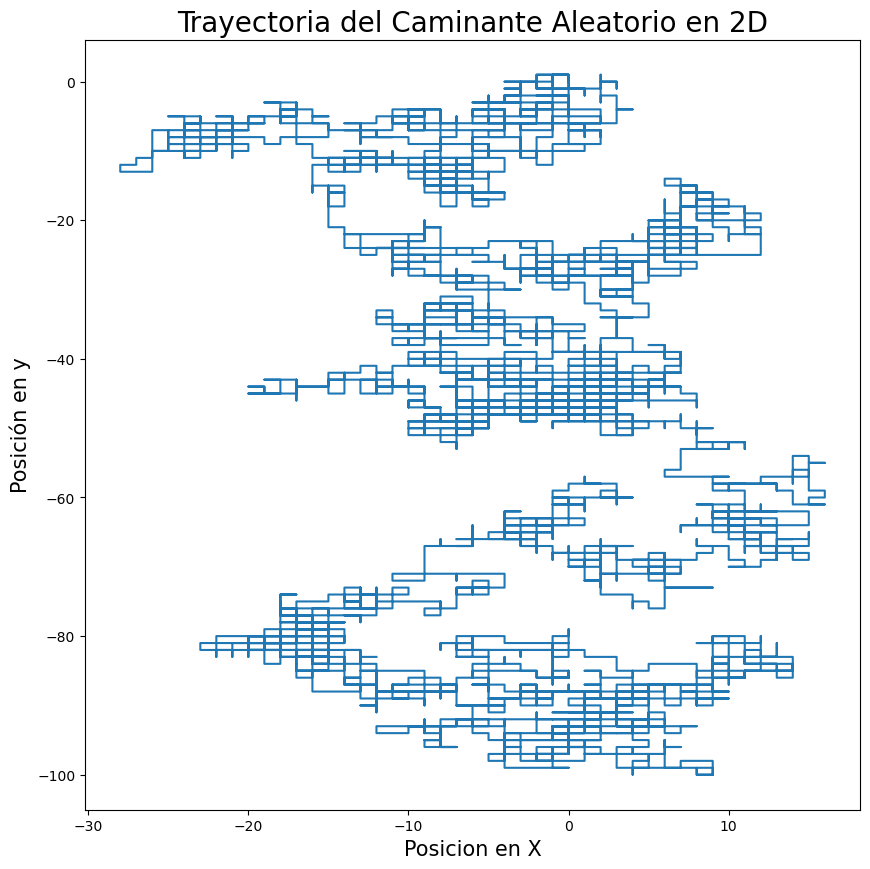

In [21]:
import matplotlib.pyplot as plt
import plotly
import numpy as np

def pasos():
    direcciones = np.array([[1,0],[-1,0],[0,1],[0,-1]])
    return direcciones[np.random.choice([0,1,2,3])]

def Caminante_2D(N):
    x = np.zeros(N, dtype=np.int64)
    y = np.zeros(N, dtype=np.int64)
    posicion= np.array([0,0])
    for i in range (1,N):
        posicion = posicion + pasos()
        x[i] = posicion[0]
        y[i] = posicion[1]
    return x,y

N=5000
x,y=Caminante_2D(N)
fig,ax = plt.subplots(figsize=(10,10))
plt.xlabel('Posicion en X', fontsize=15)
plt.ylabel('Posición en y', fontsize=15)
plt.title('Trayectoria del Caminante Aleatorio en 2D', fontsize=20)
ax.plot(x,y)

Text(0.5, 1.0, 'Trayectoria de varios Caminantes Aleatorios en 2D')

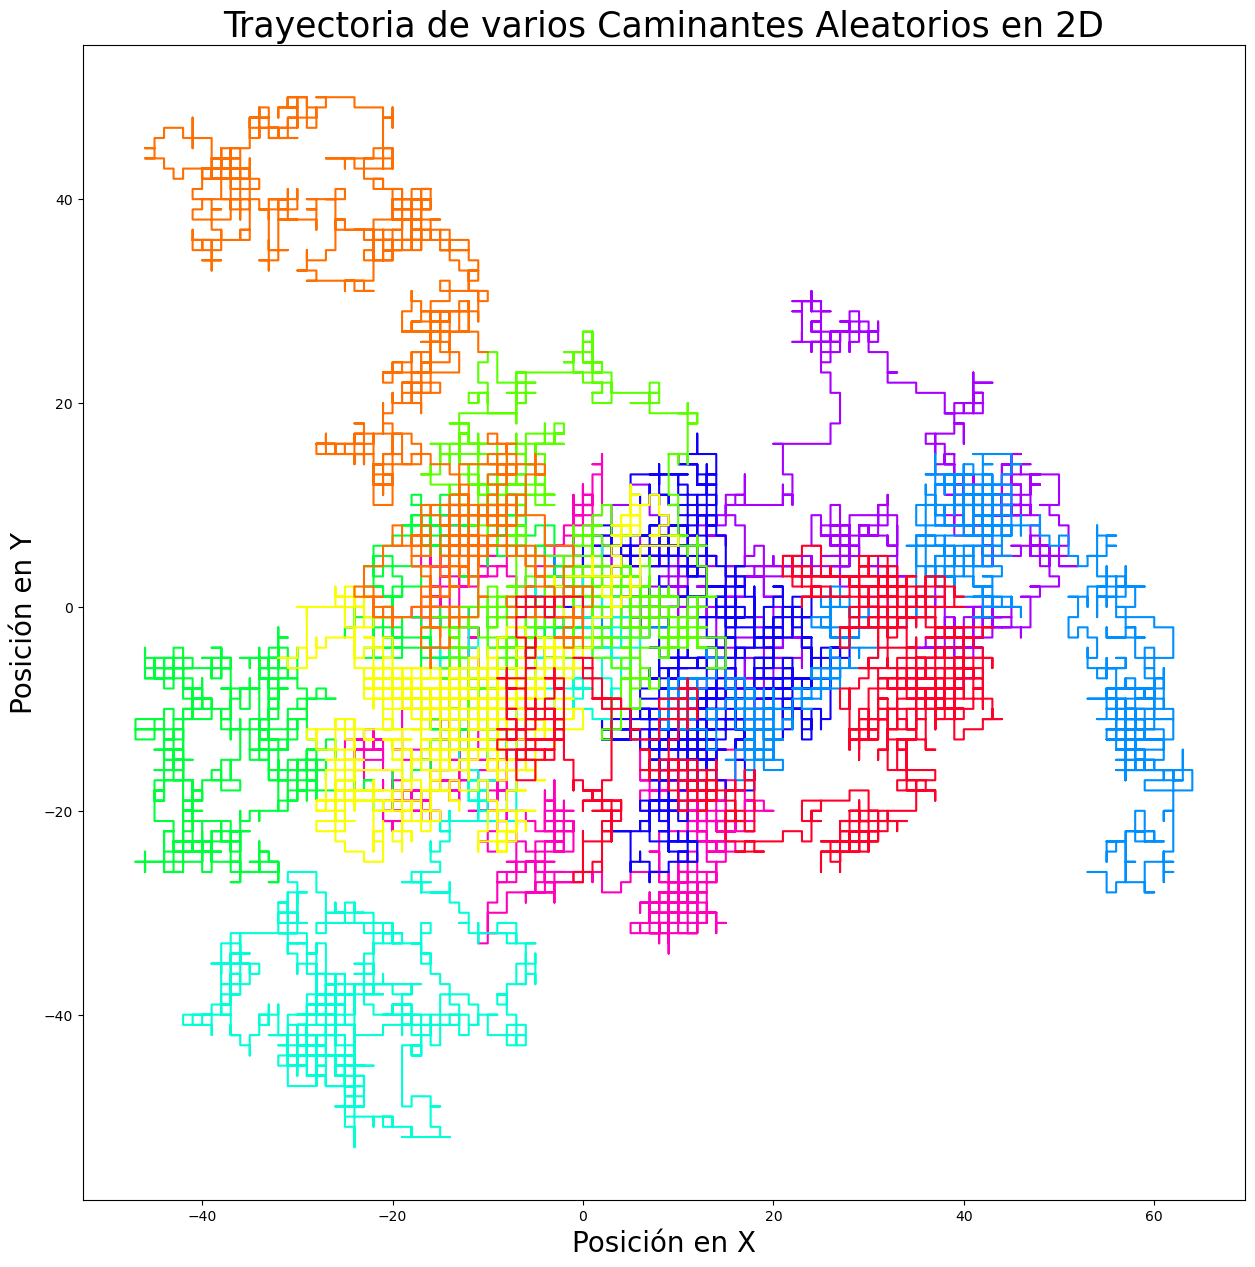

In [19]:
import matplotlib.pyplot as plt
import plotly
import numpy as np

def pasos():
    direcciones = np.array([[1,0],[-1,0],[0,1],[0,-1]])
    return direcciones[np.random.choice([0,1,2,3])]

def Caminante_2D(N):
    x = np.zeros(N, dtype=np.int64)
    y = np.zeros(N, dtype=np.int64)
    posicion= np.array([0,0])
    for i in range (1,N):
        posicion = posicion + pasos()
        x[i] = posicion[0]
        y[i] = posicion[1]
    return x,y

N=2000
n=10
color_idx = np.linspace(1,0,n)
fig, ax = plt.subplots(figsize=(15,15))

for i in range (0,n):
    x,y=Caminante_2D(N)
    ax.plot(x,y, color=plt.cm.gist_rainbow(color_idx[i]))
ax.set_xlabel('Posición en X', fontsize=20)
ax.set_ylabel('Posición en Y', fontsize=20)
ax.set_title("Trayectoria de varios Caminantes Aleatorios en 2D",fontsize=25)